In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import math
%matplotlib inline

## 1. Data undestanding

### a. Dataset size

In [3]:
# Loading the datast and display data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Understanding the survey's questions
df_fields = pd.read_csv('survey_results_schema.csv')
df_fields.head(200)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


In [5]:
df.shape

(51392, 154)

In [6]:
num_rows = df.shape[0]
num_features = df.shape[1]

In [7]:
print('Our dataset has ' + str(num_rows) + ' rows and ' + str(num_features) + ' fields.')

Our dataset has 51392 rows and 154 fields.


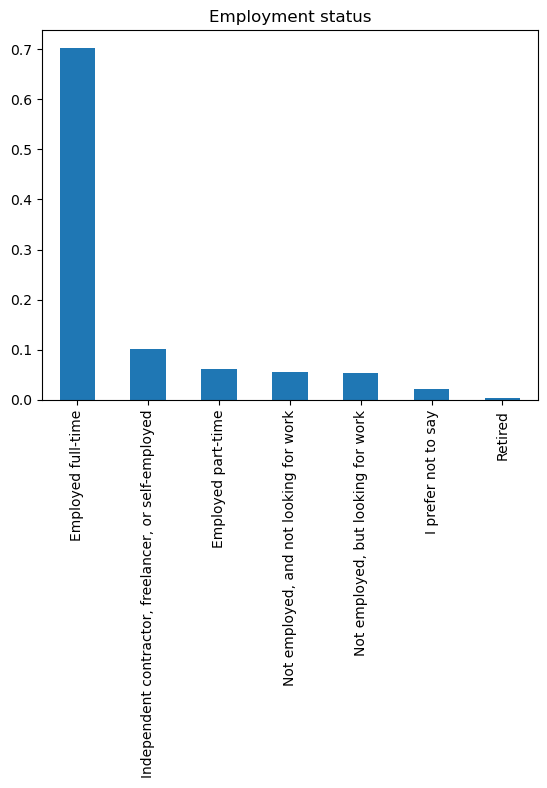

In [8]:
stat_employment = df.EmploymentStatus.value_counts()
(stat_employment/df.shape[0]).plot(kind="bar");
plt.title("Employment status");

In [9]:
# The above picture shws us that around 70% of people are employed full-time

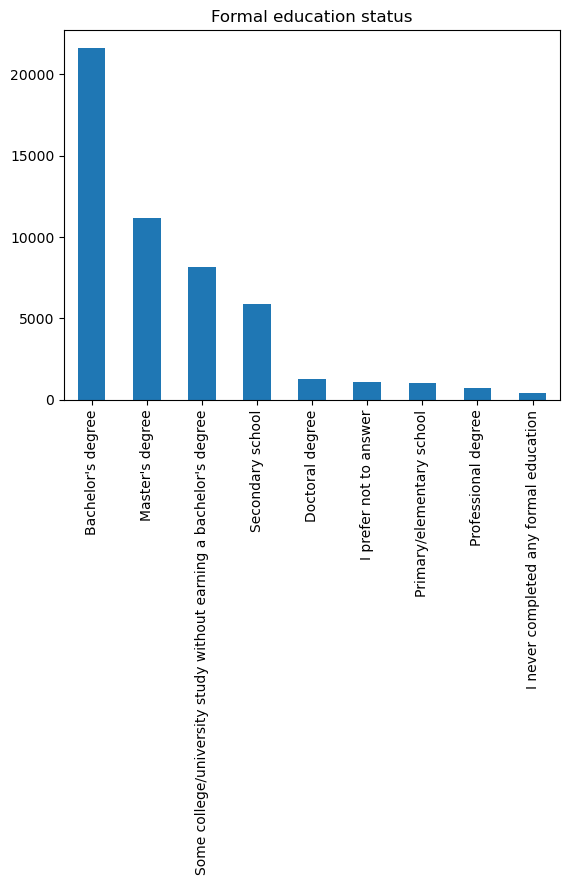

In [10]:
# (PART I) To see that that people doing coding didnt do bis study for ol of them  
stat_formaleducaton = df.FormalEducation.value_counts()
#(stat_formaleducaton/df.shape[0]).plot(kind="bar");
(stat_formaleducaton).plot(kind="bar");
plt.title("Formal education status");

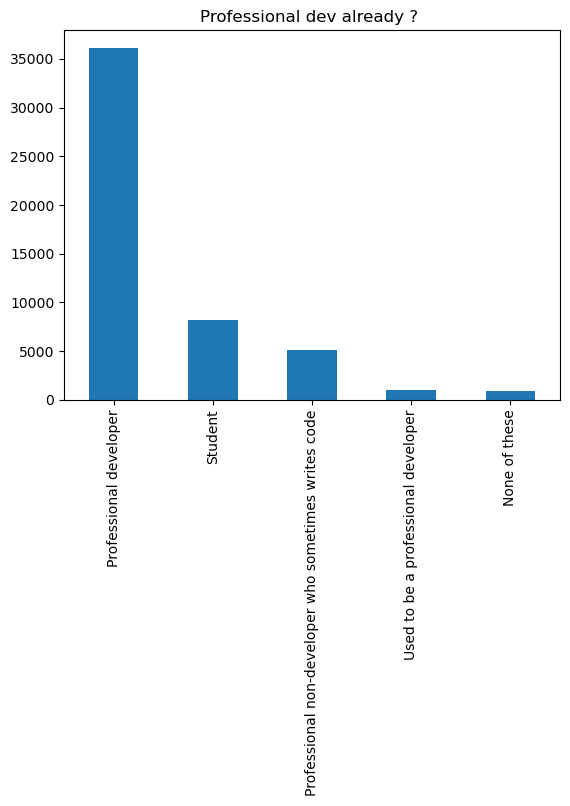

In [11]:
stat_professional = df.Professional.value_counts()
(stat_professional).plot(kind="bar");
plt.title("Professional dev already ? ");

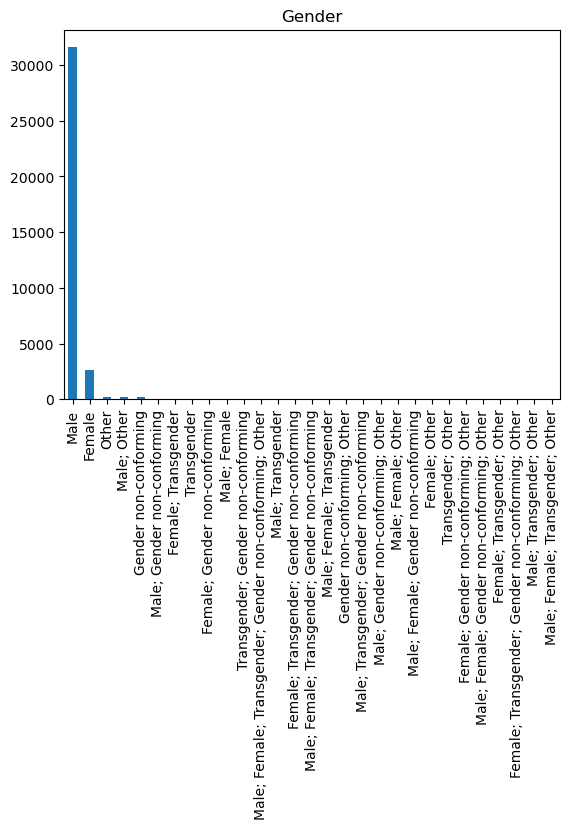

In [12]:
# (PART II) To see everybody has the same chance to code, whatever your gender...
stat_gender = df.Gender.value_counts()
stat_gender.plot(kind="bar");
plt.title("Gender");

## 2. Data preparation

In [14]:
# (PART III) To see if people spend a lot time by working remotly or at the office
df.groupby(['HomeRemote']).mean()['HoursPerWeek'].sort_values()

C:\Users\pkowa\AppData\Local\Temp\ipykernel_14460\554714623.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['HomeRemote']).mean()['HoursPerWeek'].sort_values()


HomeRemote
It's complicated                                           2.592838
Never                                                      3.294249
A few days each month                                      3.295040
Less than half the time, but at least one day each week    3.411154
All or almost all the time (I'm full-time remote)          4.504069
More than half, but not all, the time                      4.882688
About half the time                                        4.951187
Name: HoursPerWeek, dtype: float64

In [15]:
# The above result show us that working remotely, we spend moe time that at the office.